# CHAPTER20 딥러닝 튜닝

## 20.1 하이퍼파라미터

- 네트워크를 구성시 사람이 조정해야하는 파라미터

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential([
    layers.Dense(256, input_dim=784, activation='sigmoid'), # 하이퍼파라미터 : 은닉층수(은닉층의 채널수), 활성화 함수
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.5), # 하이퍼파라미터 : 드롭아웃 비율
    layers.Dense(10, activation='softmax')
])

sgd = keras.optimizers.SGD(learning_rate=0.1) # 하이퍼파라미터 : 학습률
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) # 하이퍼파라미터 : 옵티마이저, 로스

history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test)) # 하이퍼파라미터 : 배치 사이즈, epoch수

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

## 20.2 네트워크 구조

- 네트워크 구조(은닉층 수, 은닉층의 유닛 수)는 자유롭게 설정 가능
- 층이나 유닛수가 너무 많거나 적으면 원활한 학습이 힘들기에 적절한 수로 조정하는 것이 중요하다

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))

def funcA():
    model.add(Dense(128))
    model.add(Activation('sigmoid'))

def funcB():
    model.add(Dense(128))
    model.add(Activation('sigmoid'))
    model.add(Dense(128))
    model.add(Activation('sigmoid'))
    model.add(Dense(128))
    model.add(Activation('sigmoid'))

def funcC():
    model.add(Dense(1568))
    model.add(Activation('sigmoid'))

funcA()
# funcB()
# funcC()

model.add(Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1) 

loss, acc = model.evaluate(X_test, y_test)
print(f'loss : {loss} \nacc : {acc}')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
188/188 [==============================] - 1s 4ms/step - loss: 1.3686 - accuracy: 0.6393
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.7001 - accuracy: 0.8322
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.5578 - accuracy: 0.8675
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.5190 - accuracy: 0.8672
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.8340
loss : 0.568393349647522 
acc : 0.8339999914169312


## 20.3 드롭아웃

- 과적합을 방지하고 모델의 정확도를 높이는 방법 중 하나
- 드롭아웃을 적용하면 유닛의 일부가 학습할때마다 무작위로 0으로 적용됨 -> 학습x

Epoch 1/5
12/12 [==============================] - 2s 77ms/step - loss: 2.4426 - accuracy: 0.1442 - val_loss: 2.0594 - val_accuracy: 0.4800
Epoch 2/5
12/12 [==============================] - 1s 51ms/step - loss: 2.1098 - accuracy: 0.2558 - val_loss: 1.8519 - val_accuracy: 0.6410
Epoch 3/5
12/12 [==============================] - 1s 41ms/step - loss: 1.8761 - accuracy: 0.3708 - val_loss: 1.6706 - val_accuracy: 0.6830
Epoch 4/5
12/12 [==============================] - 0s 34ms/step - loss: 1.6852 - accuracy: 0.4727 - val_loss: 1.5006 - val_accuracy: 0.7190
Epoch 5/5
12/12 [==============================] - 0s 35ms/step - loss: 1.5267 - accuracy: 0.5500 - val_loss: 1.3622 - val_accuracy: 0.7450


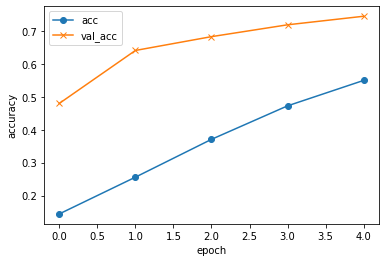

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128, activation='sigmoid'))
################################### 드롭아웃 코드 작성 ########################
model.add(Dropout(0.5))
################################### 드롭아웃 코드 작성 ########################
model.add(Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test)) # 하이퍼파라미터 : 배치 사이즈, epoch수

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

## 20.4 활성화 함수

- 층 뒤에 적용하는 함수로, 뉴런에 발화에 해당한다
- 완전연결층에서는 입력을 선형 변환된 것을 출력하지만 활성화 함수를 이용해서 비선형성을 갖게 한다

### 20.4.1 시그모이드 함수

- 1 / (1 + np.exp(-x))

### 20.4.2 ReLU 함수

- 0 (x<0)
- x (x>0)
- 출력이 어떤 구간에도 수렴되지 않고 극단적인 출력값이 생성될 가능성이 있다

## 20.5 손실 함수

- 학습시 모델의 출력과 데이터의 차이를 평가하는 함수
- 이 손실 함수를 최소화하기 위해 오차역전파로 각 층의 가중치를 갱신한다

### 20.5.1 제곱 오차

- 정답값과 예측값의 오차에 제곱을 한 값. 회귀에 적합하며 최소치 부근에서 천천히 갱신되므로 학습이 수렴하기 쉽다

### 20.5.2 교차 엔트로피 오차

- 이항 분류 평가에 특화되있으며 주로 분류 모델의 오차 함수로 사용된다
- 정답 라벨과 예측 라벨의 값이 가까울수록 작은 값이 된다

## 20.6 최적화 함수

- 가중치 갱신은 오차 함수를 각 가중치로 미분한 값을 바탕으로 갱신해야 할 방향과 어느 정도 갱신할지를 결정한다
- 손실 함수, epoch 수 등 여러 정보를 바탕으로 가중치를 갱신한다
- 최적화 함수는 하이퍼파라미터이며, 맞지 않는 함수 사용시 학습에 많은 시간이 걸릴 수도 있다

## 20.7 학습률

- 각 층의 가중치를 한번에 얼마나 갱신할지 결정하는 하이퍼파라미터
- 너무 크면 발산하거나 너무 작으면 수렴하는데 오랜 시간이 걸리므로 적절한 학습률을 지정하는 것이 중요하다

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))

def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# funcA()
funcB()
# funcC()

model.add(Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=lr) 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1) 

loss, acc = model.evaluate(X_test, y_test)
print(f'loss : {loss} \nacc : {acc}')

Epoch 1/5
188/188 [==============================] - 1s 4ms/step - loss: 1.2457 - accuracy: 0.6082
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.7939 - accuracy: 0.7620
Epoch 3/5
188/188 [==============================] - 1s 6ms/step - loss: 0.6907 - accuracy: 0.7975
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.6748 - accuracy: 0.8067
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7503 - accuracy: 0.7420
loss : 0.7502784132957458 
acc : 0.7419999837875366


## 20.8 미니배치 학습

- 한번에 전달하는 데이터 수를 배치 사이즈라 한다
- 복수의 데이터를 이용해 가중치를 갱신하면 극단적으로 바뀐 데이터의 영향을 덜받고 병렬 계산이 가능하여 계산시간이 단축된다
- 배치크기가 1인 학습은 온라인 학습(확률적 경사하강법)
- 배치 크기를 전체 데이터수로 지정하는 방식은 배치 학습(경사하강법)
- 이 둘의 중간을 미니배치 학습이라 한다

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# funcA()
# funcB()
funcC()

model.add(Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=lr) 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=1) 

loss, acc = model.evaluate(X_test, y_test)
print(f'loss : {loss} \nacc : {acc}')

Epoch 1/5
94/94 [==============================] - 1s 5ms/step - loss: 1.1188 - accuracy: 0.6877
Epoch 2/5
94/94 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.8483
Epoch 3/5
94/94 [==============================] - 0s 5ms/step - loss: 0.5264 - accuracy: 0.8643
Epoch 4/5
94/94 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.8785
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.8560
loss : 0.5224056243896484 
acc : 0.8560000061988831


## 20.9 반복 학습

- 모델의 정확도를 높이기 위해 동일한 훈련 데이터로 여러번 학습시킨다
- epoch수가 높다고 모델의 정확도가 계속 오르진 않는다. 과하면 과적합이 발생하기에 적절한 수를 정해줘야한다

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))

def funcA():
    global epoch
    epoch = 5

def funcB():
    global epoch
    epoch = 10

def funcC():
    global epoch
    epoch = 60

# funcA()
# funcB()
funcC()

model.add(Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=lr) 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, batch_size=32, epochs=epoch, verbose=1) 

loss, acc = model.evaluate(X_test, y_test)
print(f'loss : {loss} \nacc : {acc}')

Epoch 1/60
188/188 [==============================] - 1s 4ms/step - loss: 1.2713 - accuracy: 0.5990
Epoch 2/60
188/188 [==============================] - 1s 4ms/step - loss: 0.7784 - accuracy: 0.7700
Epoch 3/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6826 - accuracy: 0.8043
Epoch 4/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6735 - accuracy: 0.7955
Epoch 5/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6283 - accuracy: 0.8105
Epoch 6/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6136 - accuracy: 0.8085
Epoch 7/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6275 - accuracy: 0.8073
Epoch 8/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6076 - accuracy: 0.8167
Epoch 9/60
188/188 [==============================] - 1s 4ms/step - loss: 0.5872 - accuracy: 0.8203
Epoch 10/60
188/188 [==============================] - 1s 4ms/step - loss: 0.6227 - accuracy: 0.8112

## 연습 문제

- 하이퍼파라미터는 활성화 함수, 드롭아웃 비율, 학습률, 최적화 함수, 오차 함수, 배치 사이즈, epoch수 등

In [9]:
# 여기서 파이퍼파라미터 하나만 변경해서 0.85를 달성하라
# epoch=5 고정, 데이터 고정

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

# 변경 전 0.63
#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#----------------------------

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


600/600 [==============================] - 2s 3ms/step - loss: 1.7827 - accuracy: 0.3722
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 1.3954 - accuracy: 0.4897
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 1.2641 - accuracy: 0.5373
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 1.3297 - accuracy: 0.5102
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 1.1961 - accuracy: 0.5625
evaluate loss: 1.0303350687026978
evaluate acc: 0.6349999904632568


In [10]:
# 여기서 파이퍼파라미터 하나만 변경해서 0.85를 달성하라
# epoch=5 고정, 데이터 고정

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

# 학습률 0.1 -> 0.01 변경
# 0.63 -> 0.83
#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.01) # 0.1 -> 0.01 
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#----------------------------

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 2.0054 - accuracy: 0.3158
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 1.3159 - accuracy: 0.5997
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.9853 - accuracy: 0.7132
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.8032 - accuracy: 0.7753
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.6941 - accuracy: 0.8088
evaluate loss: 0.6043983697891235
evaluate acc: 0.8399999737739563


In [14]:
# 여기서 파이퍼파라미터 하나만 변경해서 0.85를 달성하라
# epoch=5 고정, 데이터 고정

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

# batch_size 10 -> 32
# 0.63 -> 0.82
#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1) 
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#----------------------------

Epoch 1/5
188/188 [==============================] - 1s 4ms/step - loss: 1.7516 - accuracy: 0.4112
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 1.0546 - accuracy: 0.6623
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.8976 - accuracy: 0.7133
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.8314 - accuracy: 0.7412
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.7326 - accuracy: 0.7707
evaluate loss: 0.6373745799064636
evaluate acc: 0.8299999833106995


In [21]:
# 여기서 파이퍼파라미터 하나만 변경해서 0.85를 달성하라
# epoch=5 고정, 데이터 고정

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

# batch_size 10 -> 64
# 0.63 -> 0.84
#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1) 
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#----------------------------

Epoch 1/5
94/94 [==============================] - 1s 5ms/step - loss: 1.9017 - accuracy: 0.3572
Epoch 2/5
94/94 [==============================] - 1s 5ms/step - loss: 1.1487 - accuracy: 0.6470
Epoch 3/5
94/94 [==============================] - 1s 5ms/step - loss: 0.8772 - accuracy: 0.7402
Epoch 4/5
94/94 [==============================] - 1s 5ms/step - loss: 0.7514 - accuracy: 0.7817
Epoch 5/5
94/94 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.7963
evaluate loss: 0.5615936517715454
evaluate acc: 0.8460000157356262


In [25]:
# 여기서 파이퍼파라미터 하나만 변경해서 0.85를 달성하라
# epoch=5 고정, 데이터 고정

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

# batch_size 10 -> 70
# 0.63 -> 0.86
#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1) 
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=70, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

#----------------------------

Epoch 1/5
86/86 [==============================] - 1s 5ms/step - loss: 1.9363 - accuracy: 0.3352
Epoch 2/5
86/86 [==============================] - 0s 5ms/step - loss: 1.1879 - accuracy: 0.6453
Epoch 3/5
86/86 [==============================] - 0s 5ms/step - loss: 0.8768 - accuracy: 0.7503
Epoch 4/5
86/86 [==============================] - 0s 5ms/step - loss: 0.7327 - accuracy: 0.7967
Epoch 5/5
86/86 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.8117
evaluate loss: 0.5571668148040771
evaluate acc: 0.8679999709129333
